In [1]:
import pandas as pd

In [3]:
passageiros = pd.read_csv('Passageiros.csv')

In [4]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
import seaborn as sns

In [6]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

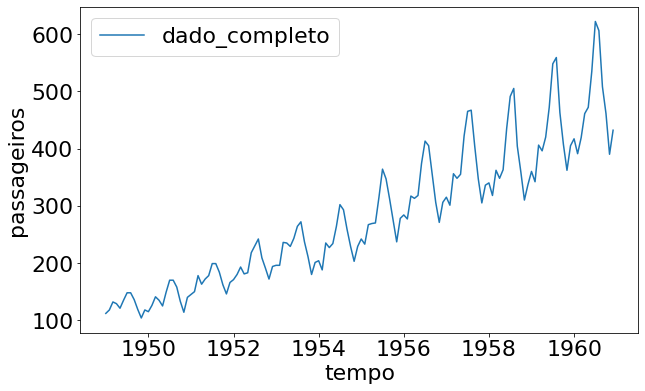

In [7]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
dado_escalado = sc.transform(passageiros)

In [12]:
x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

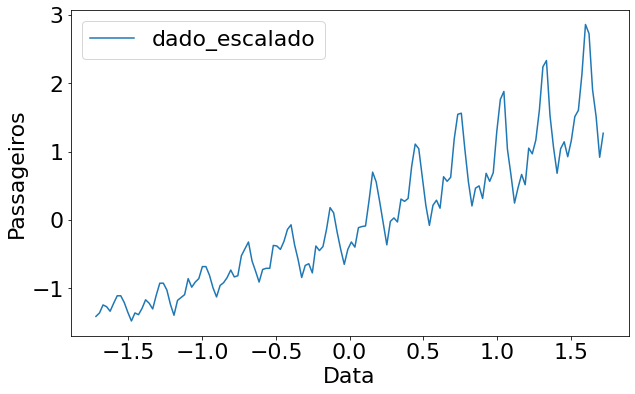

In [14]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

In [15]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [16]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [17]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

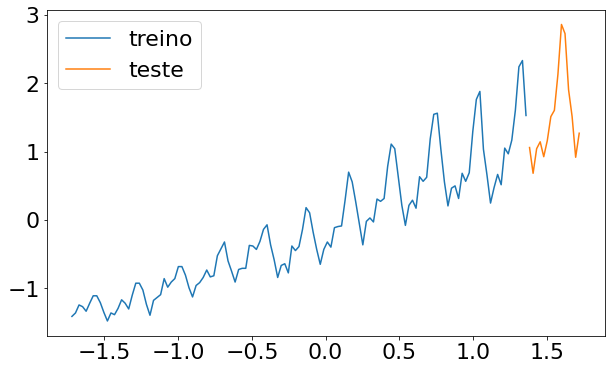

In [18]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
regressor = Sequential()

In [21]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [22]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [24]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1201


In [25]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

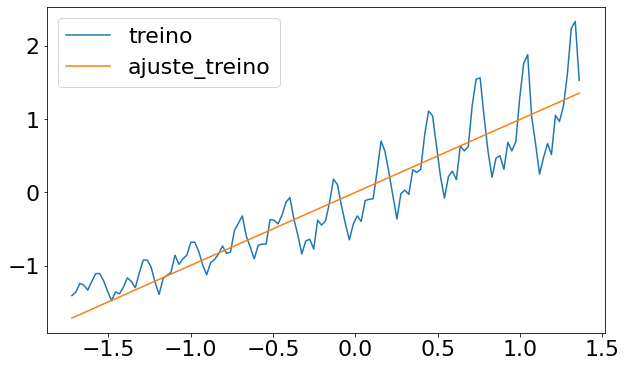

In [26]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [27]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [28]:
resultados

,tempo,passageiros
0,-1.720064,-1.712519
1,-1.696007,-1.688568
2,-1.671950,-1.664617
3,-1.647894,-1.640666
4,-1.623837,-1.616714
...,...,...
124,1.262984,1.257444
125,1.287041,1.281396
126,1.311098,1.305347
127,1.335155,1.329298


In [29]:
resultado_transf = sc.inverse_transform(resultados)

In [30]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

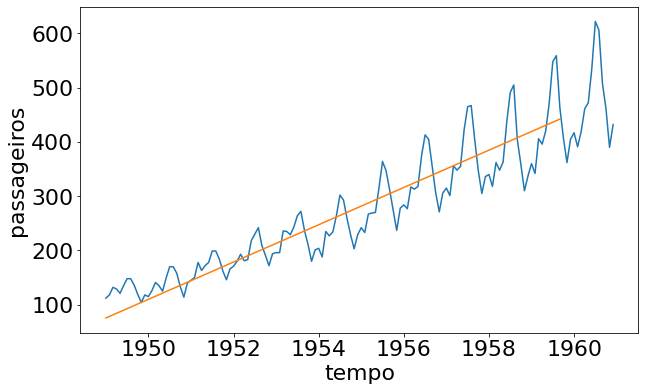

In [31]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [32]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

In [33]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [34]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [35]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

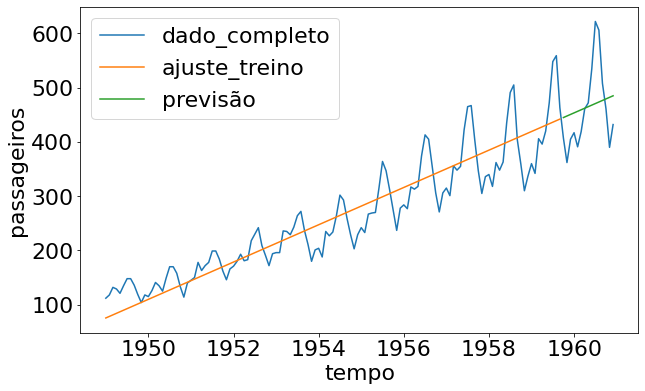

In [36]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

regressao linear

In [37]:
regressor2 = Sequential()

In [38]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [39]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [40]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7948
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8006
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 0.8364
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7554
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8680
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8197
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8204
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8308
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7229
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8163
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7346
Epoch 12/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8496
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [41]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [42]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

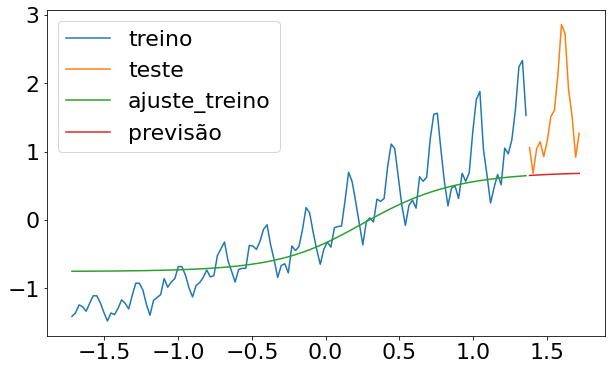

In [43]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

In [44]:
vetor = pd.DataFrame(ytreino)[0]

In [45]:
import numpy as np

In [46]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [47]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [48]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [49]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [50]:
vetor2 = pd.DataFrame(yteste)[0]

In [51]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [52]:
regressor3 = Sequential()

In [53]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [54]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7633
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6855
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8050
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7498
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7362
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6929
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7357
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6770
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6741
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5398
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5457
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5584
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [55]:
y_predict_novo = regressor3.predict(xtreino_novo)

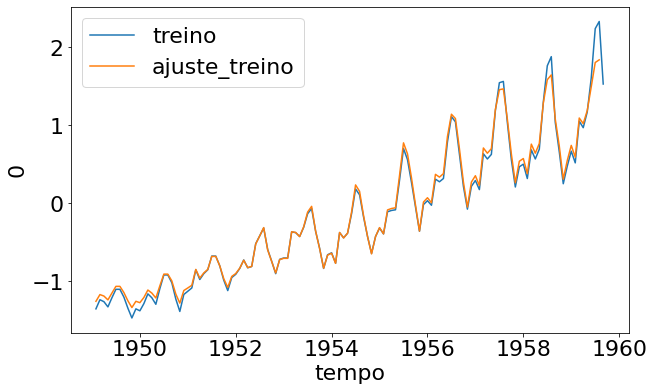

In [56]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [57]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [58]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

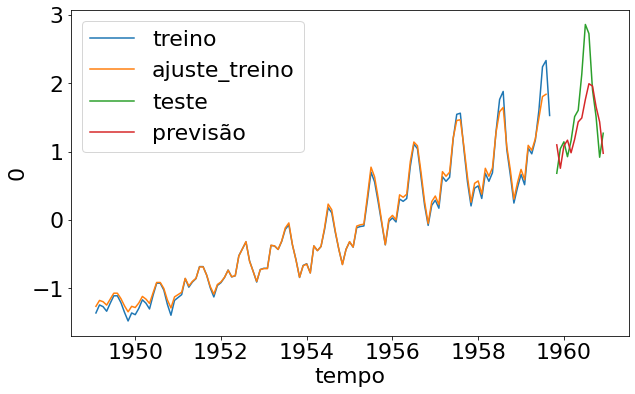

In [59]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

In [60]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [61]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [62]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [63]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [64]:
regressor4 = Sequential()

In [65]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [66]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7512
Epoch 2/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7320
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.8341
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6945
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.8012
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7440
Epoch 7/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7306
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6600
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7483
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.8058
Epoch 11/300
4/4 [==============================] - 0s 3ms/step - loss: 0.7151
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7384
Epoch 13/300
4/4 [==============================] - 0s 4ms/st

In [67]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [68]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

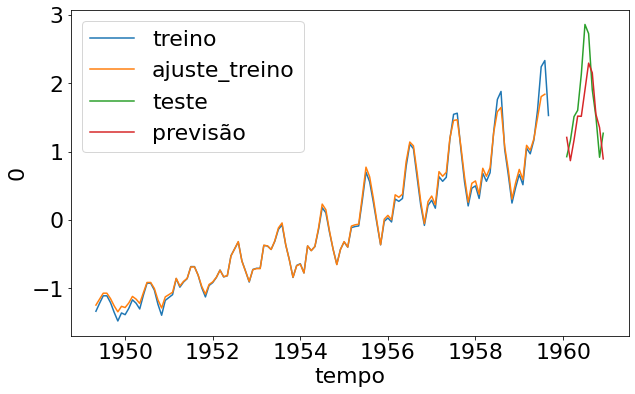

In [69]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')

In [70]:
bike = pd.read_csv('bicicletas.csv')

In [71]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

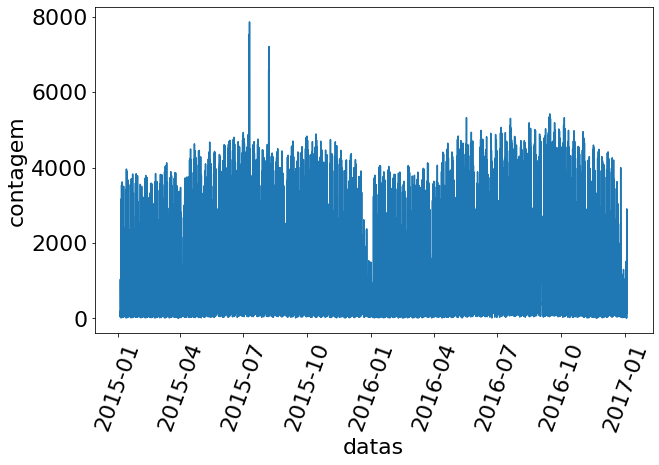

In [72]:
sns.lineplot(x='datas',y='contagem', data=bike)
plt.xticks(rotation=70)

In [73]:
sc2 = StandardScaler()

In [74]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [75]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [76]:
tamanho_treino = int(len(bike)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(bike)-tamanho_treino #O resto vamos reservar para teste

In [77]:
ytreino = y[0:tamanho_treino]
yteste = y[tamanho_treino:len(bike)]

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

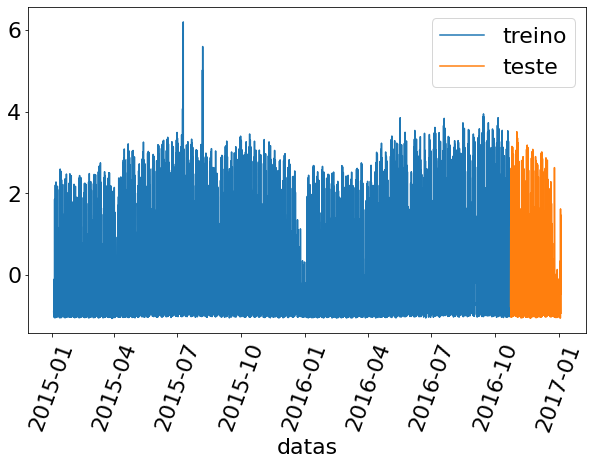

In [78]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino') 
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
plt.xticks(rotation=70) 

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [ ]:
xtreino_novo[0:5]

In [ ]:
ytreino_novo[0:5]

In [79]:
vetor2 = pd.DataFrame(yteste)[0]

In [80]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

In [81]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0],xtreino_novo.shape[1],1))

In [82]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0],xteste_novo.shape[1],1))

In [83]:
from tensorflow.keras.layers import LSTM

In [84]:
recorrente = Sequential()

In [85]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente.add(Dense(units=1))

In [86]:
recorrente.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [87]:
resultado = recorrente.fit(xtreino_novo,ytreino_novo,validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 259ms/step - loss: 0.6549 - val_loss: 0.8759
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 0.4118 - val_loss: 1.9797
Epoch 3/100
4/4 [==============================] - 0s 66ms/step - loss: 0.2784 - val_loss: 4.6450
Epoch 4/100
4/4 [==============================] - 0s 69ms/step - loss: 0.1788 - val_loss: 5.0318
Epoch 5/100
4/4 [==============================] - 0s 63ms/step - loss: 0.1971 - val_loss: 6.3564
Epoch 6/100
4/4 [==============================] - 0s 68ms/step - loss: 0.2017 - val_loss: 5.4850
Epoch 7/100
4/4 [==============================] - 0s 70ms/step - loss: 0.2010 - val_loss: 5.7132
Epoch 8/100
4/4 [==============================] - 0s 68ms/step - loss: 0.1564 - val_loss: 5.7383
Epoch 9/100
4/4 [==============================] - 0s 66ms/step - loss: 0.1798 - val_loss: 5.5561
Epoch 10/100
4/4 [==============================] - 0s 64ms/step - loss: 0.1925 - val_loss: 4.4753
Epoch 11/100
4/4 [

In [88]:
y_ajustado = recorrente.predict(xtreino_novo)

ValueError: ignored

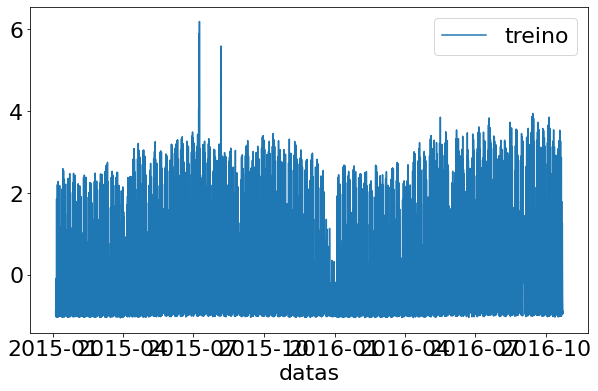

In [89]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70) 

In [90]:
y_predito = recorrente.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

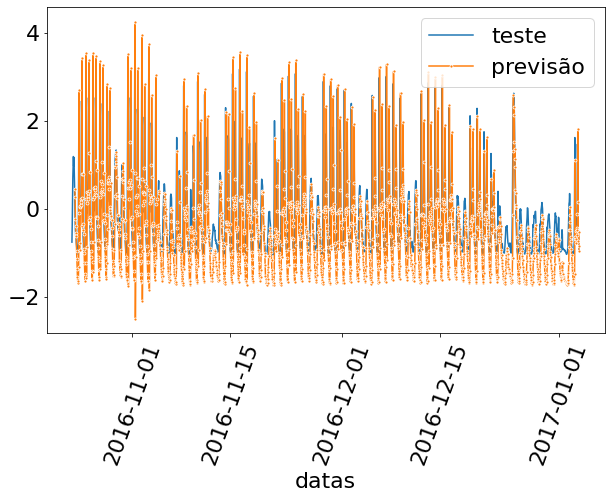

In [91]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.',label='previsão')
plt.xticks(rotation=70) 

In [92]:
from tensorflow.keras.layers import GRU

In [93]:
recorrente_g = Sequential()

In [94]:
recorrente_g.add(GRU(128, input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])
                    ))
recorrente_g.add(Dense(units=1))

In [95]:
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
recorrente_g.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               50304     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 129       
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [96]:
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo,
                              validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
4/4 [==============================] - 2s 223ms/step - loss: 0.5174 - val_loss: 0.6447
Epoch 2/100
4/4 [==============================] - 0s 52ms/step - loss: 0.1975 - val_loss: 0.8367
Epoch 3/100
4/4 [==============================] - 0s 58ms/step - loss: 0.1572 - val_loss: 0.9681
Epoch 4/100
4/4 [==============================] - 0s 57ms/step - loss: 0.1413 - val_loss: 0.9159
Epoch 5/100
4/4 [==============================] - 0s 56ms/step - loss: 0.1572 - val_loss: 0.8964
Epoch 6/100
4/4 [==============================] - 0s 59ms/step - loss: 0.1314 - val_loss: 0.8439
Epoch 7/100
4/4 [==============================] - 0s 55ms/step - loss: 0.1417 - val_loss: 0.8676
Epoch 8/100
4/4 [==============================] - 0s 55ms/step - loss: 0.1288 - val_loss: 0.7565
Epoch 9/100
4/4 [==============================] - 0s 55ms/step - loss: 0.1340 - val_loss: 0.7281
Epoch 10/100
4/4 [==============================] - 0s 56ms/step - loss: 0.1275 - val_loss: 0.7605
Epoch 11/100
4/4 [

In [97]:
y_predito2 = recorrente_g.predict(xteste_novo)

(array([736269., 736283., 736299., 736313., 736330.]),
 <a list of 5 Text major ticklabel objects>)

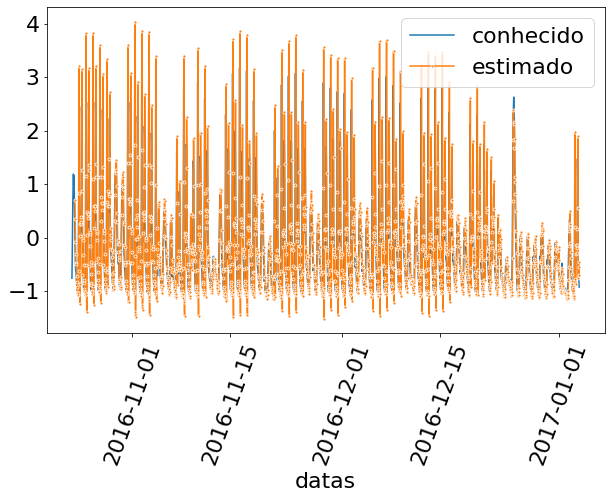

In [98]:
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)])
sns.lineplot(x='datas',y=y_predito2[:,0], data=bike[tamanho_treino+10:len(bike)],marker='.')
plt.legend(['conhecido','estimado'])
plt.xticks(rotation=70) 

In [99]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


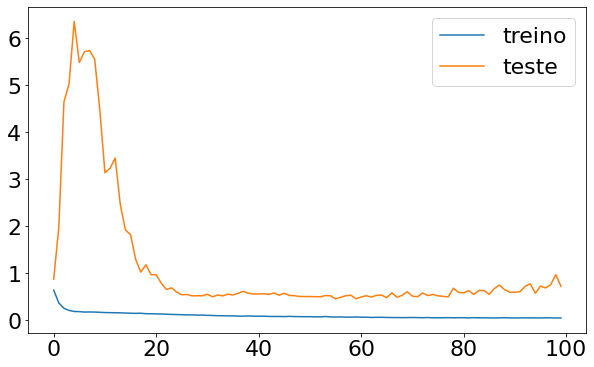

In [100]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])

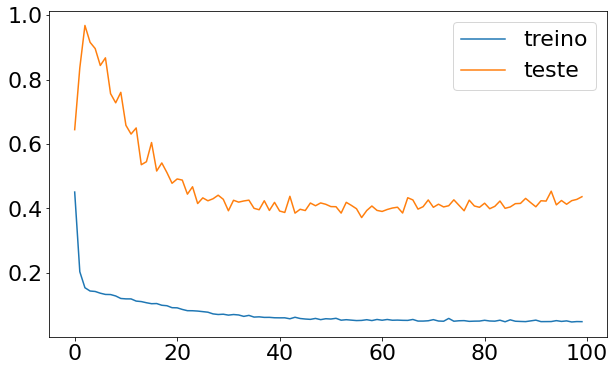

In [101]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
